# 附录：卷积神经网络在MNIST数据集上的应用

要使用卷积神经网络 (CNN) 识别 MNIST 数据库中的字符，可以按照以下步骤操作：

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 

## MNIST数据集


本页提供的手写数字[MNIST 数据库](http://yann.lecun.com/exdb/mnist/) 有一个包含 60,000 个示例的训练集和一个包含 10,000 个示例的测试集。它是 NIST 提供的更大数据集中的一个子集。这些数字的大小已标准化，并在固定大小的图像中居中。

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

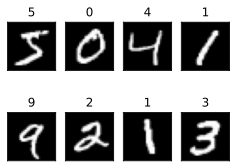

In [3]:
fig, ax = plt.subplots(ncols = 4, nrows = 2, figsize=(4, 3))
ax = ax.flatten()

for i in range(8): 
    img = x_train[i,:,:].reshape(28,28)
    label = y_train[i]
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title('%s' %label)
#plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

## 过滤器

In [4]:
from keras.layers import Conv2D
from keras.models import Sequential

In [5]:
model = Sequential()
img_shape = (28,28,1)
model.add(Conv2D(filters=6,
                kernel_size=3,            # 过滤器大小
                strides=1,                # 步长
                padding='valid',          # 填充
                input_shape=img_shape))

In [6]:
from keras.layers import Activation
model.add(Activation('relu'))

## 池化（pooling）

In [7]:
from keras.layers import MaxPool2D

In [8]:
model.add(MaxPool2D(pool_size=2,
                   strides=None,
                   padding='valid'))

## Flatten层

In [9]:
from keras.layers import Flatten
from keras.layers import Dense

## 模型

In [10]:
from keras.layers import Conv2D
from keras.models import Sequential
from keras.layers import Activation, Flatten, Dense, MaxPool2D, Dropout

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 
28, 1)),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                      

In [13]:
import numpy as np
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [14]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000,))

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 编译

In [16]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])

### 训练

In [17]:
history = model.fit(x_train,
                   y_train,
                   batch_size=32,
                   epochs=5,
                   validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0630 - acc: 0.7506 - val_loss: 0.1378 - val_acc: 0.9625
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2544 - acc: 0.9269 - val_loss: 0.0915 - val_acc: 0.9751
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1618 - acc: 0.9532 - val_loss: 0.0849 - val_acc: 0.9766
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1275 - acc: 0.9637 - val_loss: 0.0782 - val_acc: 0.9778
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1104 - acc: 0.9686 - val_loss: 0.0785 - val_acc: 0.9786


### 精度

In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0785 - acc: 0.9786


[0.07849674671888351, 0.978600025177002]

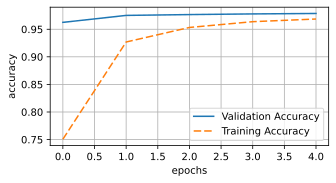

In [19]:
fig, ax = plt.subplots(figsize=(5,2.5))
gen = ax.plot(history.history['val_acc'], label='Validation Accuracy')
fr = ax.plot(history.history['acc'], dashes=[5,2], label='Training Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
ax.legend()
plt.grid()

## 测试识别能力

(1, 28, 28, 1)
1/1 [==============================] - 0s 101ms/step
(1, 10)
1/1 [==============================] - 0s 7ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 8ms/step
(1, 10)
1/1 [==============================] - 0s 8ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 8ms/step
(1, 10)
1/1 [==============================] - 0s 8ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 7ms/step
(1, 10)
1/1 [==============================] - 0s 7ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 7ms/step
(1, 10)
1/1 [==============================] - 0s 7ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 7ms/step
(1, 10)
1/1 [==============================] - 0s 7ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 7ms/step
(1, 10)
1/1 [==============================] - 0s 7ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 7ms/step
(1, 10)
1/1 [==============================] - 0s 7ms/ste

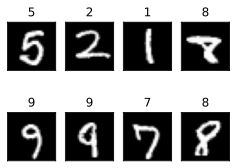

In [20]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(4, 3))
ax = ax.flatten()

for i in range(8): 
    test = x_test[np.random.randint(0, x_test.shape[0], 1)]
    img = test.reshape(28,28)
    print(test.shape)
    print(model.predict(test).shape)
    label = np.argmax(model.predict(test))
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title('%s' %label)

## 附录

keras 提供了以下数据集
1. MNIST： 一个经典的手写数字识别数据集，包含 
60,000 张训练图像和 10,000 张测试图像。
2. CIFAR-10：加拿大面部识别工具数据集，包含 60,000 张 32x32 彩色图像，分为 10 个等级。
包括 10 个类别的 60,000 张 32x32 彩色图像。
3. SVHN：大规模图像分类数据集，包含 73,257 张训练图像和 25,984 张测试图像。
训练图像和 25,984 张测试图像。
4. ImageNet： 一个海量数据集，包含超过 1400 万张图像，分属 21 841 个类别。
21,841 个类别。
5. COCO：Common Objects in Context 数据集，包含 330,000 张训练图像和 50,000 张带有对象注释的测试图像。
训练图像和 50,000 张带有对象注释的测试图像。
6. Stanford Cars：一个包含 16,185 张汽车、卡车和其他车辆图像的数据集。
车辆。
7. birds-2011： 由世界各地 11,700 张鸟类图像组成的数据集。
8. flowers-2013： 包含 9,400 张花卉图像的数据集。
9. USPS-text： 一个包含 50,000 个文本文档的数据集，用于情感分析。
